### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<Axes: title={'center': 'Null Value Count'}>

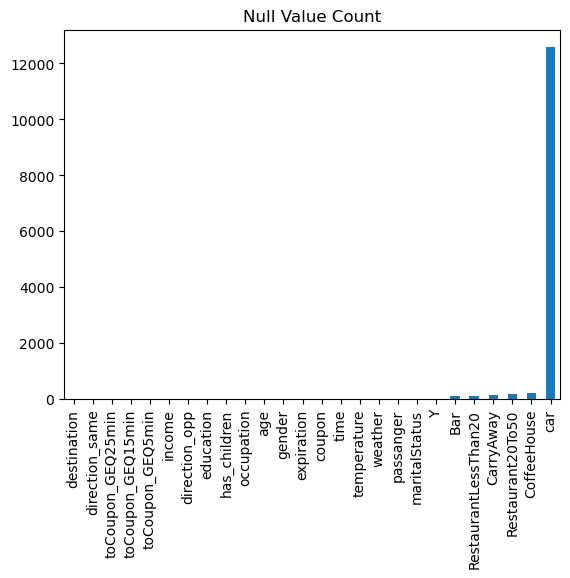

In [4]:
data.isna().sum().sort_values().plot(kind='bar', title='Null Value Count')

The column 'car' seems to have null values in almost all of its users listed.
What does the column 'car' mean though? 
Let's see what does the non-null values look like.

In [5]:
data[~data['car'].isna()]['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

According to the data's context, I would presume that this represents the vehicle that the user is currently using when he/she received the coupon as he/she is heading towards his/her destination.

The bar-chart also shows that the columns 'Bar', 'RestaurantLessThan20', 'CarryAway', Restaurant20To50', and 'CoffeeHouse' have very few null-values.

3. (1) Decide what to do about your missing data -- drop, replace, other...

Since the column 'car' mostly has null-values, I would say that this column is unreliable. Thus, as part of the data cleaning, I would drop this column.
As for the other columns that also have null-values, since they have very little null-values, I would keep these columns and just get rid of users that have null-values on any of these columns since cleaning away a few users wouldn't impact the data that much.

In [6]:
data_clean = data.drop(columns=['car'])
data_clean.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

<Axes: title={'center': 'Null Value Count After Data Cleaning'}>

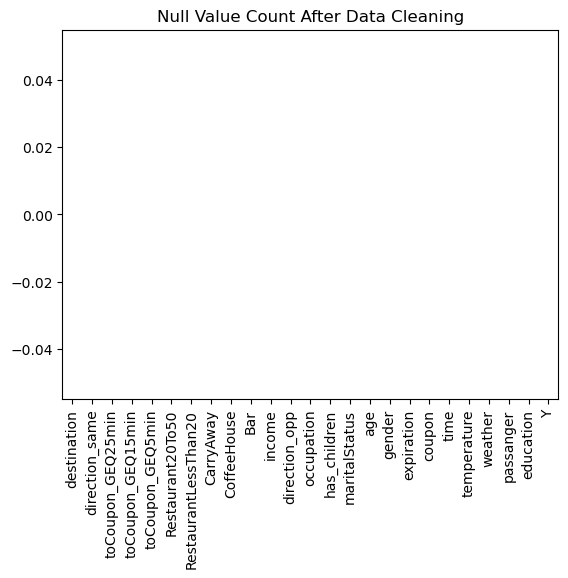

In [7]:
data_clean = data_clean.dropna()
data_clean.isna().sum().sort_values().plot(kind='bar', title='Null Value Count After Data Cleaning')

In [8]:
data.shape[0] - data_clean.shape[0]

605

In [9]:
data_clean.shape[0]

12079

After cleaning, only 605 users were removed, and there are still over 12k users left. Thus, I believe the cleaned data is still sufficiently reliable and accurate.

3. (2) Additional Corrections/Modifications

In [10]:
data_clean.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

I've noticed that the column "passanger" is spelled incorrectly. Thus, I will rename it correctly.

In [11]:
data_clean = data_clean.rename(columns={'passanger':'passenger'})
data_clean.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

I will check on the datatypes in the dataset to see if there are any types I should change for the sake of better data splitting or comparing.

In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

'time' column catches my attention because its type is an object but may be a good idea to change it into an integer type.

In [13]:
data_clean['time'].unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

For the sake of easier data splitting/comparing, I will change the column 'time' into an integer 24-Hour Clock Time. I will also rename the 'time' column into 'time_hour_24' for better clarification.

In [14]:
def clock(time):
    timeInt = None
    if (time.endswith('AM')) :
        timeInt = time.replace('AM','')
        timeInt = int(timeInt)
        if (timeInt == 12) :
            timeInt = 0
    elif (time.endswith('PM')) :
        timeInt = time.replace('PM','')
        timeInt = int(timeInt) + 12
    return timeInt

In [15]:
data_clean[['time']].head(10)

,time
22,2PM
23,10AM
24,10AM
25,10AM
26,2PM
27,2PM
28,2PM
29,2PM
30,6PM
31,6PM


In [16]:
data_clean['time'] = data_clean['time'].map(clock)

In [17]:
data_clean = data_clean.rename(columns={'time':'time_hour_24'})

In [18]:
data_clean[['time_hour_24']].head(10)

,time_hour_24
22,14
23,10
24,10
25,10
26,14
27,14
28,14
29,14
30,18
31,18


'age' column also catches my attention for the same reason.

In [19]:
data_clean['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

I will change the 'age' column to an integer column as well. For the 'below21', I will just change it into integer 20 and for the '50plus', I will change it into integer 50. I will keep in mind that 20 means users of age 20 or lower and 50 means users of age 50 or higher.

In [20]:
def ageInt(age):
    if ('below' in age):
        age = age.replace('below','')
        age = int(age) - 1
    elif ('plus' in age):
        age = age.replace('plus','')
    return int(age)

In [21]:
data_clean['age'] = data_clean['age'].map(ageInt)

In [22]:
data_clean['age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 12079 entries, 22 to 12683
Series name: age
Non-Null Count  Dtype
--------------  -----
12079 non-null  int64
dtypes: int64(1)
memory usage: 188.7 KB


4. What proportion of the total observations chose to accept the coupon? 



<Axes: title={'center': '(0 - Reject Coupon) (1 - Accept Coupon)'}, ylabel='Y'>

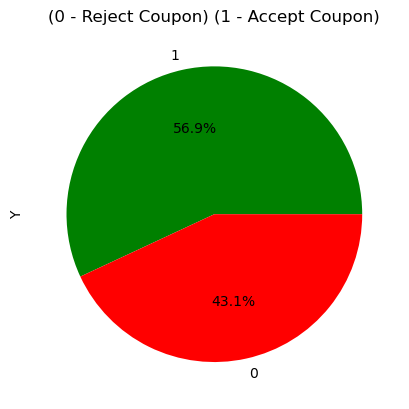

In [23]:
data_clean['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], title='(0 - Reject Coupon) (1 - Accept Coupon)')

According to the pie chart of the cleaned data, 56.9% chose to accept the coupon which is a little over a half of the users listed in the clean data.

5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 1.0, 'Coupon Frequency')]

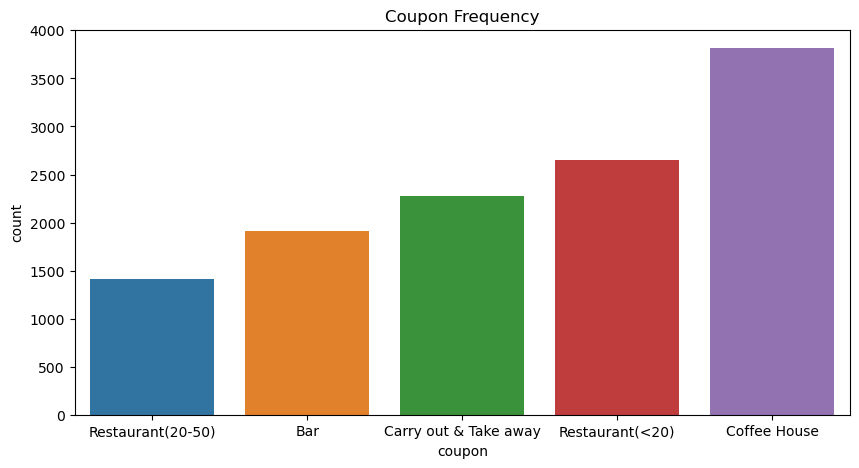

In [24]:
plt.figure(figsize = (10, 5))
sns.countplot(data_clean, x='coupon', 
              order=data_clean['coupon'].value_counts(ascending=True).index).set(title='Coupon Frequency')

Expensive Restaurant coupons ($20-50) are the least frequent coupons in the dataset,
and the Coffee House coupons are the most frequent coupons in the dataset.

6. Use a histogram to visualize the temperature column.

[Text(0.5, 1.0, 'Temperature Frequency')]

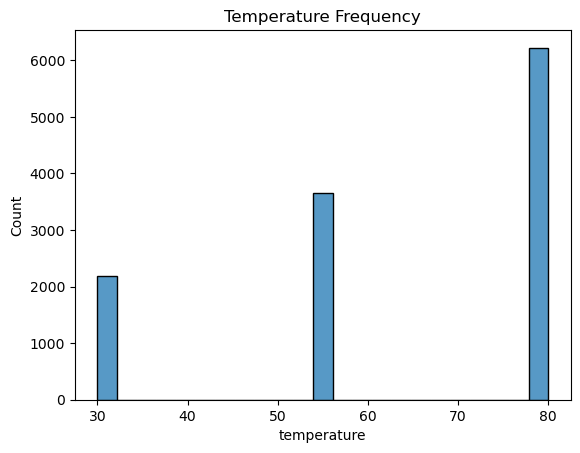

In [25]:
sns.histplot(data_clean['temperature']).set(title='Temperature Frequency')

Apparently, temperature 30F is least frequent, 55F is in between, and 80F is the most frequent.
Seems like there is a positive correlation between temperature and its frequency.

### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [26]:
bar_coupons = data_clean[data_clean['coupon'].str.contains('Bar')]
bar_coupons.head(10)

,destination,passenger,weather,temperature,time_hour_24,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,18,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,18,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
79,Home,Alone,Sunny,55,18,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,1
83,Work,Alone,Sunny,55,7,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,1
90,No Urgent Place,Friend(s),Sunny,80,10,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1


2. What proportion of bar coupons were accepted?


<Axes: title={'center': '(0 - Reject Bar Coupon) (1 - Accept Bar Coupon)'}, ylabel='Y'>

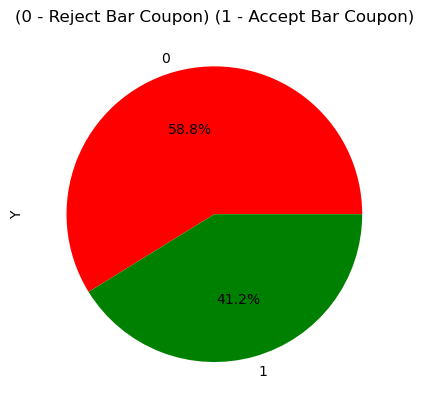

In [27]:
bar_coupons['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', 
                                     colors = ['r', 'g'], title='(0 - Reject Bar Coupon) (1 - Accept Bar Coupon)')

Among all users who receive the bar coupons in the cleaned data, only 41.2% of them accepted the coupon which is a little below half of the users listed in the bar coupon dataset.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


To do that, let's first find how many different answers there are in the 'Bar' column.

In [28]:
bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

To compare the acceptance rate, let's split the bar coupon dataset into two. 
The first will have users who visit the bar 3 or fewer times ('never', 'less1', '1~3').

The second will have users who visit the bar more than 3 times (4~8, 'gt8').
We shall calculate acceptance of each one.

-------------Monthly Visit Bar 3 or Fewer Times Analysis-------------

In [29]:
less_than_3 = ['never', 'less1', '1~3']

In [30]:
# unique() method used to confirm that my dataframe is queried as I expect.
# More unique() methods will be used for that similar reason as you scroll down.
bar_less_than_3 = bar_coupons.query('Bar in @less_than_3')
bar_less_than_3['Bar'].unique()

array(['never', 'less1', '1~3'], dtype=object)

In [31]:
# For any sample() method you see that you may think is arbitrary,
# keep in mind that it is used to explore if my dataframe has been queried as I expect.
# The unique() method above would have provide absolute certainty in this case but I later find that 
# this may be used as an alternative confirmation for my "Others" queried dataframe
# that you will later find as you scroll down further.
bar_less_than_3[['Bar']].sample(10)

,Bar
296,never
2469,1~3
3289,less1
224,1~3
11370,never
5347,less1
2729,1~3
8518,1~3
12266,1~3
10413,less1


<Axes: title={'center': 'Acceptance Rate (Monthly Visit Bar <= 3)'}, ylabel='Y'>

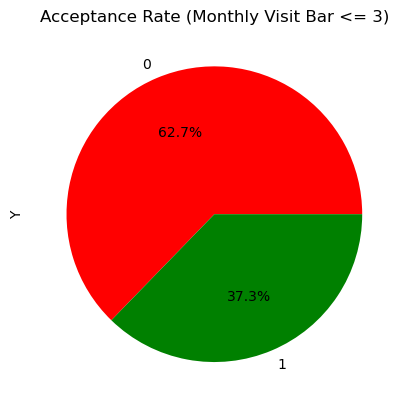

In [32]:
bar_less_than_3['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', 
                                     colors = ['r', 'g'], title='Acceptance Rate (Monthly Visit Bar <= 3)')

-------------Monthly Visit Bar More Than 3 Times Analysis-------------

In [33]:
more_than_4 = ['4~8', 'gt8']

In [34]:
bar_more_than_4 = bar_coupons.query('Bar in @more_than_4')
bar_more_than_4['Bar'].unique()

array(['gt8', '4~8'], dtype=object)

In [35]:
bar_more_than_4[['Bar']].sample(10)

,Bar
11502,gt8
2533,4~8
4625,4~8
3637,4~8
9832,4~8
10023,4~8
2217,4~8
3549,gt8
6926,gt8
3083,gt8


<Axes: title={'center': 'Acceptance Rate (Monthly Visit Bar > 3)'}, ylabel='Y'>

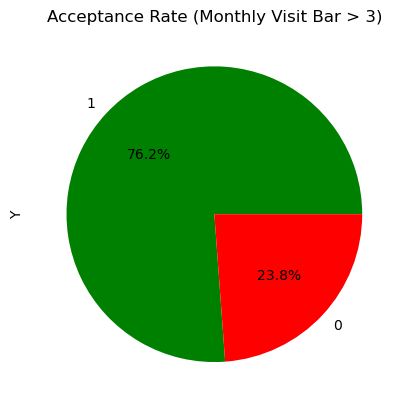

In [36]:
bar_more_than_4['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', 
                                     colors = ['g', 'r'], title='Acceptance Rate (Monthly Visit Bar > 3)')

You can see that users who monthly visit bars 3 or fewer times have a low acceptance rate on bar coupons while ones who monthly visit bars more than 3 times have a high acceptance rate.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
# Just here to look through the unique elements in 'Bar' to specifically see how each element is spelled considering that
# querying and selecting column label/element require typing the correct case-sensitive column label/element.
# You will see other unique() methods used for that similar purpose as you scroll down.
bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [38]:
# bar1_25 will represent users who monthly go to bars at least once and are over the age of 25
at_least_1 = ['1~3','4~8','gt8']
bar1_25 = bar_coupons.query('Bar in @at_least_1 and age > 25')

<Axes: title={'center': 'Acceptance Rate (Monthly Bar Visit >= 1, Age > 25)'}, ylabel='Y'>

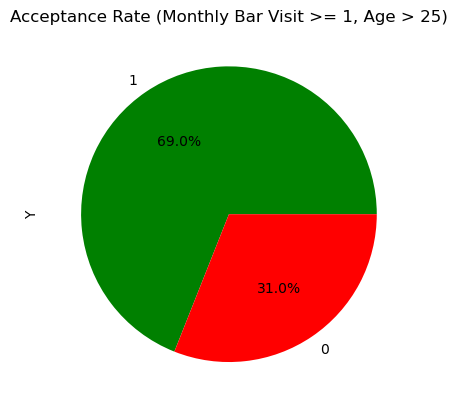

In [39]:
bar1_25['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
                                 title='Acceptance Rate (Monthly Bar Visit >= 1, Age > 25)')

In [40]:
bar_others = bar_coupons.query('Bar not in @at_least_1 or age <= 25')

<Axes: title={'center': 'Acceptance Rate (Monthly Bar Visit < 1 or Age <= 25)'}, ylabel='Y'>

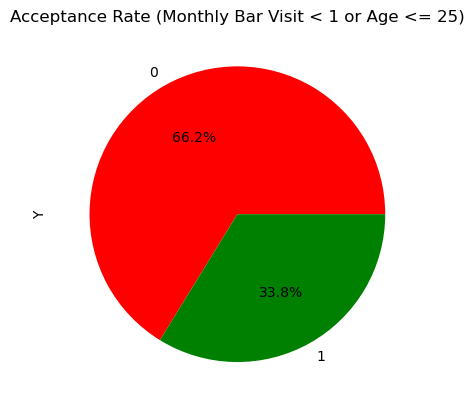

In [41]:
bar_others['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['r', 'g'], 
                                 title='Acceptance Rate (Monthly Bar Visit < 1 or Age <= 25)')

It would seem that users who monthly visit the bar at least once and are over the age of 25 are particulary keen on accepting the bar coupons compared to all other users.

5. Use the same process to compare the acceptance rate between drivers who go to bars at least once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


To do this, I will briefly analyze some related columns; 'passenger' and 'occupation'

In [42]:
bar_coupons['passenger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [43]:
bar_coupons['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

Now, I will start querying the two dataframes and visualizing their acceptance rates:

In [44]:
fafifo = ['Farming Fishing & Forestry']
kid = ['Kid(s)']
at_least_1

['1~3', '4~8', 'gt8']

In [45]:
noKidNorFoodButBar = bar_coupons.query('Bar in @at_least_1 and passenger not in @kid and occupation not in @fafifo')
noKidNorFoodButBar[['Bar','passenger','occupation']].sample(10)

,Bar,passenger,occupation
2551,4~8,Alone,Office & Administrative Support
11499,gt8,Friend(s),Student
6092,1~3,Alone,Food Preparation & Serving Related
2108,4~8,Alone,Unemployed
9400,4~8,Alone,Unemployed
8768,1~3,Partner,Education&Training&Library
2317,4~8,Friend(s),Sales & Related
7756,4~8,Friend(s),Business & Financial
3219,1~3,Alone,Business & Financial
11480,1~3,Alone,Arts Design Entertainment Sports & Media


<Axes: title={'center': 'Acceptance Rate (Monthly Bar Visit >= 1, No Kid Passenger, No Food Worker)'}, ylabel='Y'>

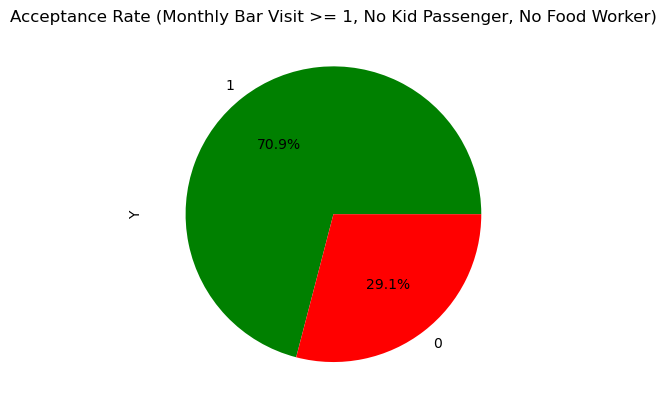

In [46]:
noKidNorFoodButBar['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
                                 title='Acceptance Rate (Monthly Bar Visit >= 1, No Kid Passenger, No Food Worker)')

In [47]:
yesKidAndFoodButNoBar = bar_coupons.query('Bar not in @at_least_1 or passenger in @kid or occupation in @fafifo')
yesKidAndFoodButNoBar[['Bar','passenger','occupation']].sample(10)

,Bar,passenger,occupation
3501,less1,Kid(s),Protective Service
12240,less1,Friend(s),Business & Financial
9114,less1,Alone,Student
9538,less1,Partner,Student
2403,never,Alone,Transportation & Material Moving
1642,1~3,Kid(s),Unemployed
1228,never,Alone,Student
12043,less1,Kid(s),Community & Social Services
12643,less1,Friend(s),Business & Financial
7013,never,Alone,Education&Training&Library


6. Compare the acceptance rates between those drivers who:

- go to bars at least once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars at least once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



First Query:

In [48]:
bar_coupons['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [49]:
widowed = ['Widowed']

In [50]:
query1 = bar_coupons.query('Bar in @at_least_1 and passenger not in @kid and maritalStatus not in @widowed')
query1[['Bar','passenger','maritalStatus']].sample(10)

,Bar,passenger,maritalStatus
12174,gt8,Friend(s),Single
3201,gt8,Alone,Married partner
6443,1~3,Alone,Single
389,1~3,Friend(s),Single
9388,4~8,Alone,Single
7335,1~3,Friend(s),Unmarried partner
3641,4~8,Alone,Single
10023,4~8,Alone,Single
9793,4~8,Alone,Single
7760,4~8,Partner,Unmarried partner


Second Query:

In [51]:
query2 = bar_coupons.query('Bar in @at_least_1 and age < 30')
query2[['Bar','age']].sample(10)

,Bar,age
2410,4~8,21
1855,1~3,21
3201,gt8,26
10445,1~3,21
9083,1~3,26
11755,1~3,21
224,1~3,21
5931,gt8,21
8425,4~8,26
3443,4~8,26


Third Query:

In [52]:
bar_coupons.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time_hour_24',
       'coupon', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [53]:
bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [54]:
more_than_4 = ['4~8', 'gt8']

In [55]:
bar_coupons['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [56]:
less_than_50k = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

In [57]:
query3 = bar_coupons.query('RestaurantLessThan20 in @more_than_4 and income in @less_than_50k')
query3[['RestaurantLessThan20','income']].sample(10)

,RestaurantLessThan20,income
11082,gt8,$37500 - $49999
3395,gt8,$37500 - $49999
1774,4~8,$12500 - $24999
624,gt8,$25000 - $37499
7548,4~8,$12500 - $24999
6517,gt8,Less than $12500
10586,gt8,$37500 - $49999
9906,4~8,$12500 - $24999
4217,4~8,$25000 - $37499
10244,4~8,Less than $12500


Comparing All Three Acceptance Rates:

<Axes: title={'center': 'Acceptance Rate (Monthly <20 Resto Visit >= 4, Income < $50k)'}, ylabel='Y'>

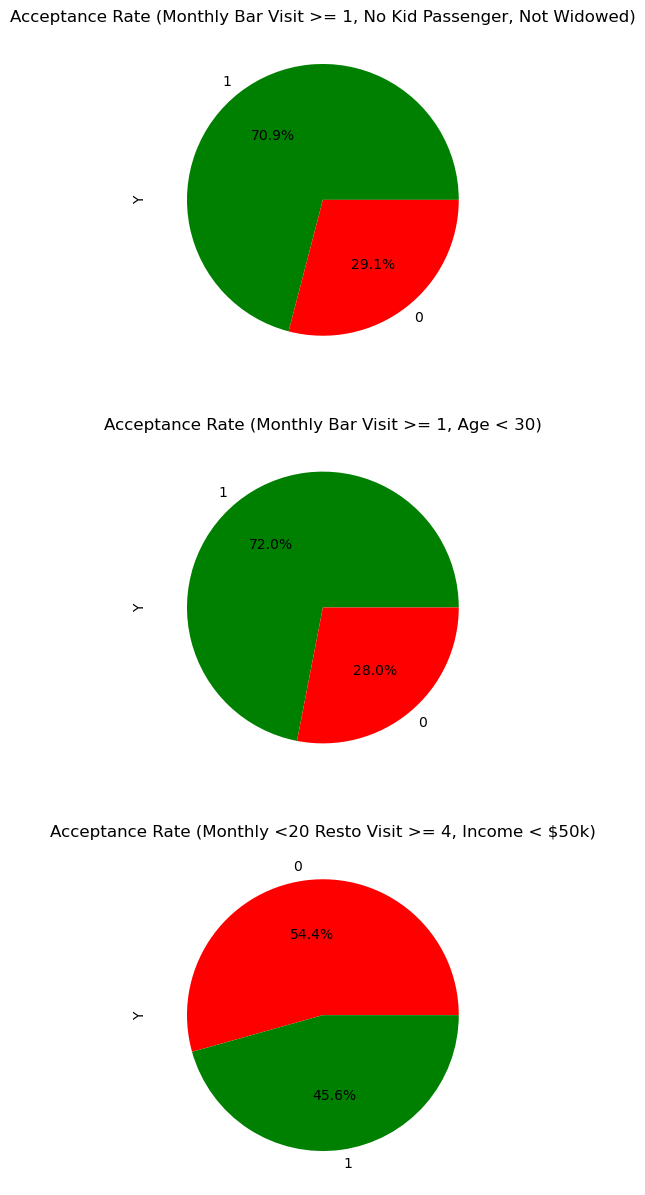

In [58]:
plt.figure(figsize=(50,15))
plt.subplot(3,1,1)
query1['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
                                 title='Acceptance Rate (Monthly Bar Visit >= 1, No Kid Passenger, Not Widowed)')
plt.subplot(3,1,2)
query2['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
                                 title='Acceptance Rate (Monthly Bar Visit >= 1, Age < 30)')
plt.subplot(3,1,3)
query3['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['r', 'g'], 
                                 title='Acceptance Rate (Monthly <20 Resto Visit >= 4, Income < $50k)')

The first two queries show a significant proportion of users using the coupons and the last query shows less than half proportion using the coupon. The first two queries show that more than half of the users listed in their respective queries decide to use the bar coupons while more than half in the third query decide not to.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Final Conclusion**

Based on my research, I can hypothesize that users who are between age 25-30 and monthly visit the bar at least once are the most likely people to use the bar coupons. They will even more likely use the bar coupon if they either don't have any kids as passenger, are not widowed, are not working for Farming Fishing & Forestry related jobs, or any mixture of the three.

**Recommended Action**

As mentioned, offer bar coupons to aged 25-30 users who at least visit the bar once at a monthly basis. In addition, go for users who currently don't have kids as their passengers, did not lose any loved ones, and are not working for any jobs related to farming, fishing, or forestry.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [59]:
data_clean['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

### Investigating the Cheap Restaurant (<20) Coupons

In [60]:
data_clean.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time_hour_24',
       'coupon', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

I suspect that the three columns: 'RestaurantLessThan20', 'Restaurant20To50', and 'income' would most likely have an affect on the users deciding on whether they will accept the cheap restaurant coupon or not.
Thus, I will investigate these three columns.

Since I am just focusing on the Cheap Restaurant Coupon, I will query the cleaned data to only users who received the Cheap Restaurant coupon.

In [61]:
cheap_rest_coupon = data_clean.query('coupon == "Restaurant(<20)"')
cheap_rest_coupon[['coupon']].sample(10)

,coupon
2666,Restaurant(<20)
6718,Restaurant(<20)
4909,Restaurant(<20)
10275,Restaurant(<20)
3974,Restaurant(<20)
4643,Restaurant(<20)
5768,Restaurant(<20)
828,Restaurant(<20)
7833,Restaurant(<20)
6267,Restaurant(<20)


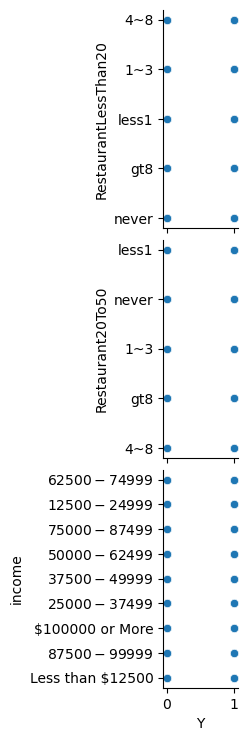

In [62]:
sns.pairplot(cheap_rest_coupon, y_vars=['RestaurantLessThan20', 'Restaurant20To50', 'income'], x_vars=['Y'])

Scatterplots DO NOT help especially when users who accept or reject the coupon can vary in their backgrounds.
Thus, I don't think I will be using scatterplots from now on.

Let's find the acceptance rate of all users who have received the cheap restaurant coupons.

<Axes: title={'center': '<20 Resto Coupon Approval'}, ylabel='Y'>

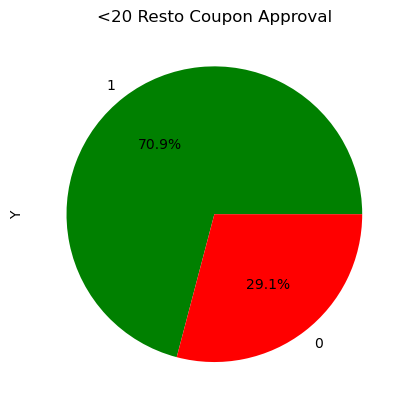

In [63]:
cheap_rest_coupon['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Resto Coupon Approval')

It would seem that most users listed are enthusiastic on accepting the cheap restaurant coupons.

I will then investigate their acceptance rate based on some conditions related to these three columns:

- monthly visit to <$20 restaurants

- monthly visit to $20-50 restaurants

- income

Let's see their acceptance rate of the cheap restaurant coupon if they monthly visit the cheap restaurant at least once.

In [64]:
at_least_1

['1~3', '4~8', 'gt8']

In [65]:
once_cheap_rest = cheap_rest_coupon.query('RestaurantLessThan20 in @at_least_1')
once_cheap_rest[['RestaurantLessThan20']].sample(10)

,RestaurantLessThan20
12506,1~3
528,4~8
12550,1~3
5721,1~3
12546,1~3
8240,4~8
9696,1~3
7016,1~3
4113,1~3
11713,4~8


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit >= 1)'}, ylabel='Y'>

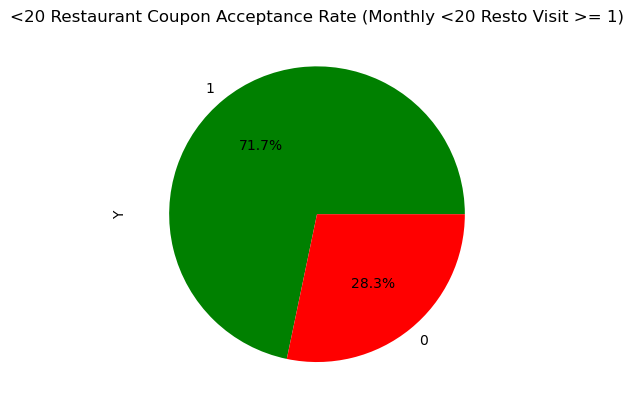

In [66]:
once_cheap_rest['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit >= 1)')

Out of curiousity, let's see if the acceptance rate increase for users who monthly visit cheap restaurants more than 3 times.

In [67]:
more_than_4

['4~8', 'gt8']

In [68]:
x4_cheap_rest = cheap_rest_coupon.query('RestaurantLessThan20 in @more_than_4')
x4_cheap_rest[['RestaurantLessThan20']].sample(10)

,RestaurantLessThan20
4973,4~8
10462,4~8
11021,4~8
4166,4~8
2049,4~8
6563,gt8
5964,4~8
11479,4~8
4744,4~8
2039,4~8


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit > 3)'}, ylabel='Y'>

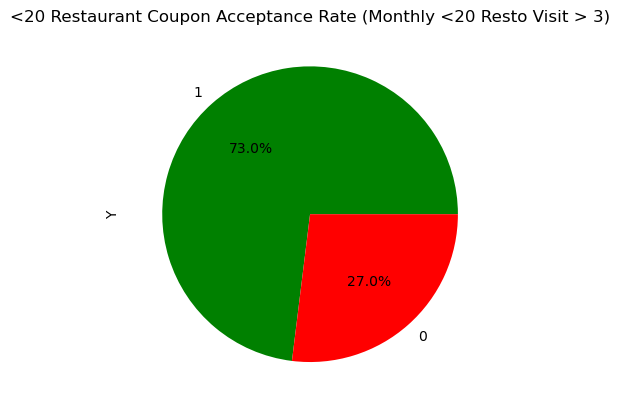

In [69]:
x4_cheap_rest['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit > 3)')

Looks like it has increase slightly but not that much. Now, let's compare the acceptance rate to users who monthly visit the cheap restaurant less than once, i.e. they might still visit but not every month.

In [70]:
less_than_1 = less_than_3
less_than_1.remove('1~3')
less_than_1

['never', 'less1']

In [71]:
less1_cheap_rest = cheap_rest_coupon.query('RestaurantLessThan20 in @less_than_1')
less1_cheap_rest[['RestaurantLessThan20']].sample(10)

,RestaurantLessThan20
10989,less1
11776,less1
995,never
9859,less1
5064,less1
11591,never
6461,less1
2971,less1
1133,less1
4685,less1


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit < 1)'}, ylabel='Y'>

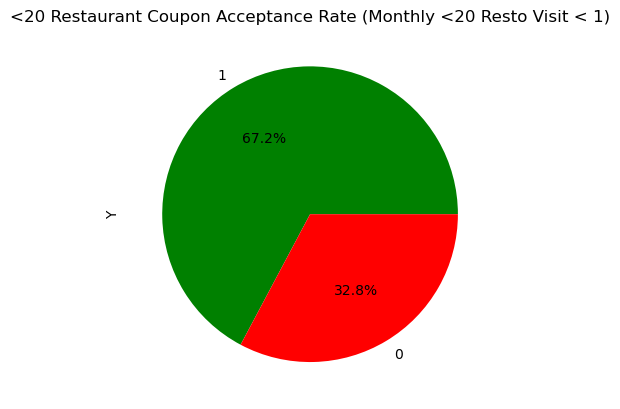

In [72]:
less1_cheap_rest['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit < 1)')

Surprisingly, more than half of these users still use the cheap restaurant coupons but the acceptance rate has indeed decreased.

Now, let's add monthly visit to expensive ($20-50) restaurants and income as additional conditions.
In fact, let's creatively make a mixture of conditions and observe their acceptance rate.
Let's also compare each acceptance rate to other users who don't meet its respective conditions.

1. Users who monthly visit cheap restaurants at least once but expensive restaurants less than once.

In [73]:
once_cheap_less_exp = once_cheap_rest.query('Restaurant20To50 in @less_than_1')
once_cheap_less_exp[['RestaurantLessThan20','Restaurant20To50']].sample(10)

,RestaurantLessThan20,Restaurant20To50
4621,1~3,never
6950,4~8,less1
6885,1~3,never
528,4~8,less1
6707,1~3,never
8704,4~8,less1
9539,1~3,less1
2901,1~3,less1
1609,gt8,never
11896,1~3,less1


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit >= 1, Monthly 20-50 Resto Visit < 1)'}, ylabel='Y'>

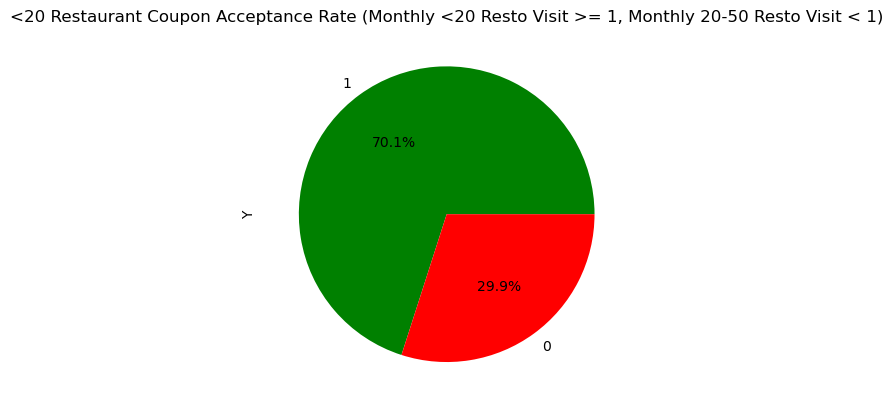

In [74]:
once_cheap_less_exp['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit >= 1, Monthly 20-50 Resto Visit < 1)')

In [75]:
others_1 = cheap_rest_coupon.query('RestaurantLessThan20 in @less_than_1 or Restaurant20To50 not in @less_than_1')

In [76]:
# As you can see, this is a sample() method used as an alternative confirmation that the dataframe is queried as I expect
# considering that unique() method cannot be used in this case because of the 'or' statement within the query.
others_1[['RestaurantLessThan20','Restaurant20To50']].sample(5)

,RestaurantLessThan20,Restaurant20To50
5032,gt8,1~3
7326,1~3,1~3
7664,less1,less1
5007,gt8,1~3
6520,gt8,4~8


<Axes: title={'center': 'Others_1'}, ylabel='Y'>

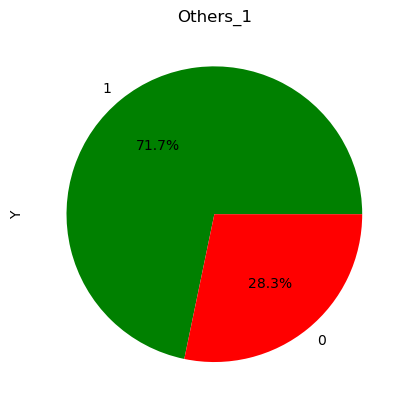

In [77]:
others_1['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_1')

The Others_1 Pie Chart shows a slightly higher acceptance rate which implies that users who monthly visit cheap restaurants at least once yet monthly visit expensive restaurants less than once would less likely accept the cheap restaurant coupons compared to all others.

2. Users who monthly visit at least once on both cheap and expensive restaurants

In [78]:
once_cheap_exp = once_cheap_rest.query('Restaurant20To50 in @at_least_1')
once_cheap_exp[['RestaurantLessThan20','Restaurant20To50']].sample(10)

,RestaurantLessThan20,Restaurant20To50
6891,1~3,1~3
2012,4~8,1~3
154,gt8,gt8
3387,gt8,1~3
2018,4~8,1~3
1726,gt8,1~3
3079,gt8,gt8
6329,gt8,1~3
8809,1~3,1~3
4249,4~8,1~3


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1)'}, ylabel='Y'>

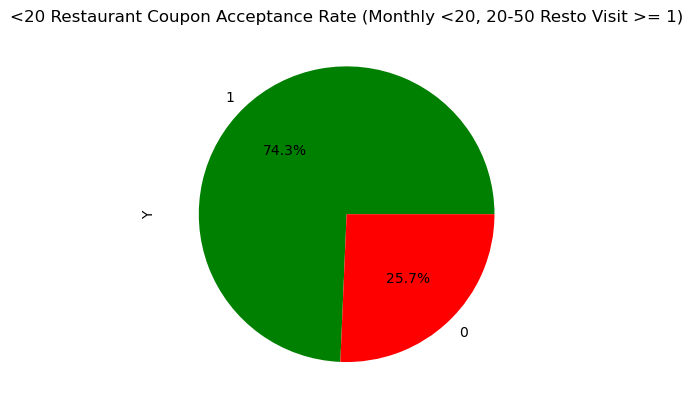

In [79]:
once_cheap_exp['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1)')

In [80]:
others_2 = cheap_rest_coupon.query('RestaurantLessThan20 in @less_than_1 or Restaurant20To50 in @less_than_1')

In [81]:
others_2[['RestaurantLessThan20','Restaurant20To50']].sample(5)

,RestaurantLessThan20,Restaurant20To50
7817,less1,less1
9887,less1,less1
8837,4~8,less1
10498,less1,less1
9348,never,never


<Axes: title={'center': 'Others_2'}, ylabel='Y'>

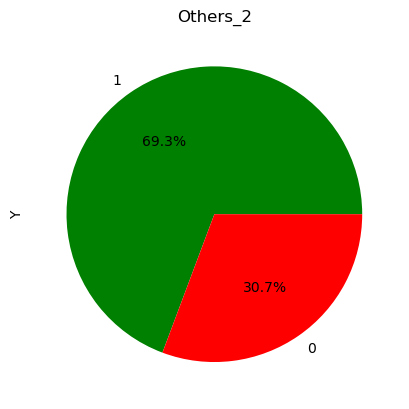

In [82]:
others_2['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_2')

It would seem that users who visit both cheap and expensive restaurants at least once are more likely to accept the cheap restaurant coupon compared to all other users.

3. Users who monthly visit a cheap and expensive restaurants at least once and has an income less than 50k

In [83]:
less_than_50k

['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

In [84]:
once_less_50k = once_cheap_rest.query('Restaurant20To50 in @at_least_1 and income in @less_than_50k')

In [85]:
once_less_50k[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
3961,1~3,1~3,$12500 - $24999
3248,1~3,1~3,$25000 - $37499
7617,1~3,4~8,$12500 - $24999
8059,gt8,1~3,$25000 - $37499
6908,1~3,1~3,$25000 - $37499


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income < $50k)'}, ylabel='Y'>

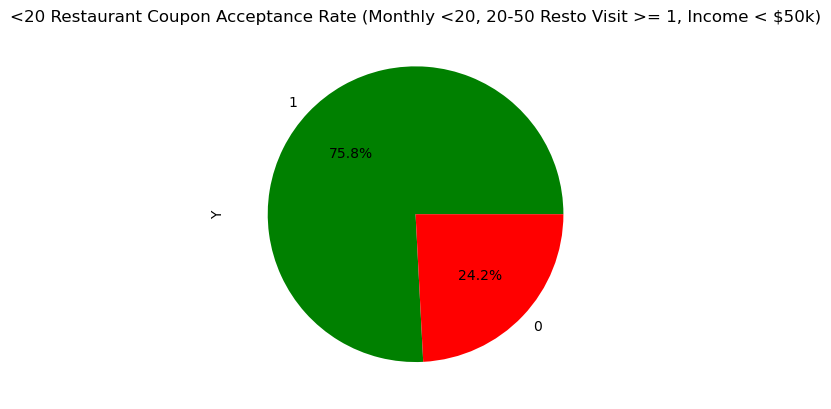

In [86]:
once_less_50k['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income < $50k)')

In [87]:
others_3 = cheap_rest_coupon.query(
    'RestaurantLessThan20 not in @at_least_1 or Restaurant20To50 not in @at_least_1 or income not in @less_than_50k')

In [88]:
others_3[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
430,less1,less1,$50000 - $62499
682,1~3,1~3,$50000 - $62499
1423,1~3,less1,$87500 - $99999
6695,1~3,never,Less than $12500
9825,1~3,less1,$25000 - $37499


<Axes: title={'center': 'Others_3'}, ylabel='Y'>

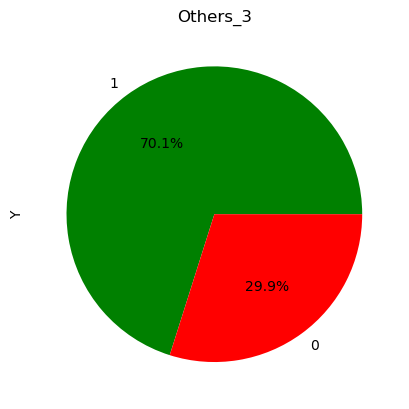

In [89]:
others_3['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_3')

It would seem that having less than $50k income in addition may increase the user's likelihood to accept the coupon.

Would users more likely accept the coupon if they have even lower income in addition? Let's confirm that.

Let's query the users' income to go down to less than $25k this time.

In [90]:
less_than_25k = less_than_50k.copy()
less_than_25k.remove('$25000 - $37499')
less_than_25k.remove('$37500 - $49999')
less_than_25k

['Less than $12500', '$12500 - $24999']

In [91]:
once_less_25k = once_cheap_rest.query('Restaurant20To50 in @at_least_1 and income in @less_than_25k')

In [92]:
once_less_25k[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
2104,4~8,1~3,Less than $12500
6529,gt8,4~8,Less than $12500
11642,1~3,1~3,Less than $12500
2080,gt8,1~3,$12500 - $24999
10439,gt8,4~8,Less than $12500


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income < $25k)'}, ylabel='Y'>

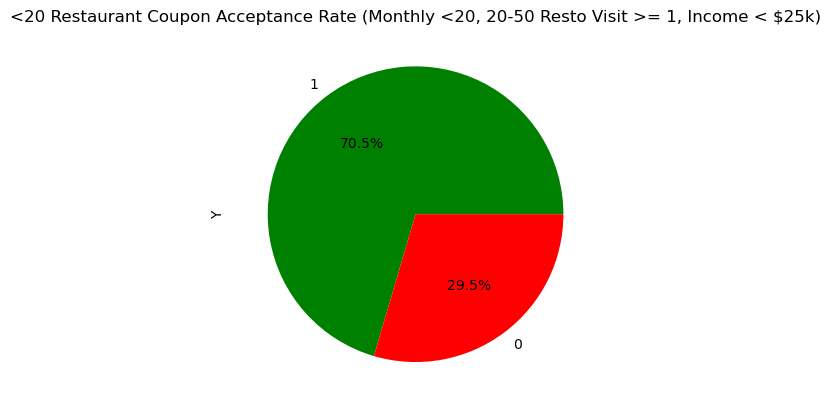

In [93]:
once_less_25k['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income < $25k)')

In [94]:
others_4 = cheap_rest_coupon.query(
    'RestaurantLessThan20 not in @at_least_1 or Restaurant20To50 not in @at_least_1 or income not in @less_than_25k')

In [95]:
others_4[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
1347,1~3,1~3,$50000 - $62499
8150,1~3,less1,$100000 or More
11732,4~8,never,$75000 - $87499
7813,1~3,1~3,$100000 or More
1110,1~3,less1,$75000 - $87499


<Axes: title={'center': 'Others_4'}, ylabel='Y'>

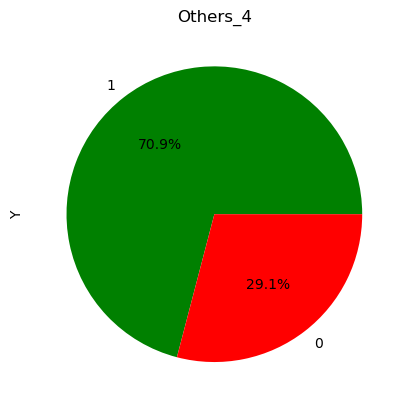

In [96]:
others_4['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_4')

Apparently that is not the case as users with income lower than $25k in addition are less likely to accept the cheap restaurant coupons.

What about users with higher income, higher than $50k?

In [97]:
once_high_50k = once_cheap_exp.query('income not in @less_than_50k')

In [98]:
once_high_50k[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
8360,4~8,1~3,$75000 - $87499
12255,1~3,1~3,$100000 or More
9936,gt8,4~8,$50000 - $62499
1666,4~8,1~3,$100000 or More
9947,1~3,1~3,$50000 - $62499


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income > $50k)'}, ylabel='Y'>

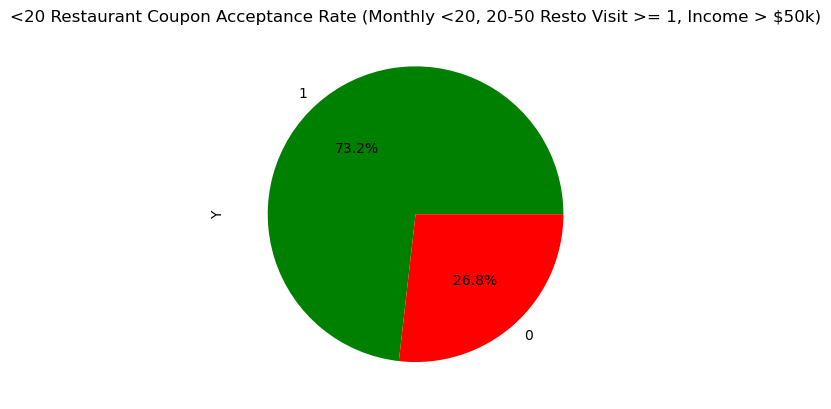

In [99]:
once_high_50k['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income > $50k)')

In [100]:
others_5 = cheap_rest_coupon.query(
    'RestaurantLessThan20 not in @at_least_1 or Restaurant20To50 not in @at_least_1 or income in @less_than_50k')

In [101]:
others_5[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
4045,4~8,less1,Less than $12500
6039,1~3,less1,$37500 - $49999
4066,less1,never,$25000 - $37499
12484,4~8,less1,$50000 - $62499
7246,4~8,less1,$100000 or More


<Axes: title={'center': 'Others_5'}, ylabel='Y'>

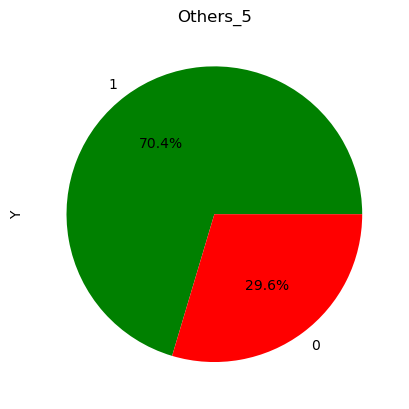

In [102]:
others_5['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_5')

There's a little increase on over the $50k as well.

Perhaps users with income $37.5-62.5k will have more likelihood of accepting the coupon. Let's find out.

In [103]:
income_37_62 = ['$37500 - $49999','$50000 - $62499']
income_37_62

['$37500 - $49999', '$50000 - $62499']

In [104]:
df_income_37_62 = once_cheap_exp.query('income in @income_37_62')

In [105]:
df_income_37_62['RestaurantLessThan20'].unique()

array(['gt8', '1~3', '4~8'], dtype=object)

In [106]:
df_income_37_62['Restaurant20To50'].unique()

array(['gt8', '1~3', '4~8'], dtype=object)

In [107]:
df_income_37_62['income'].unique()

array(['$37500 - $49999', '$50000 - $62499'], dtype=object)

<Axes: title={'center': '<20 Resto Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, $37.5 <= Income <= $62.5k)'}, ylabel='Y'>

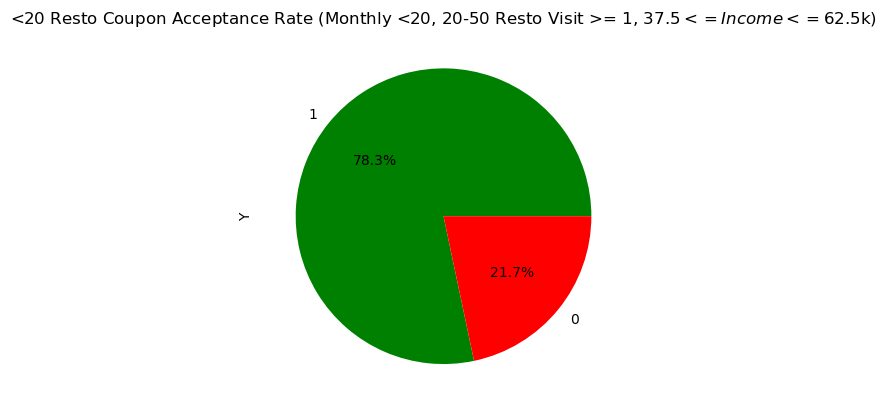

In [108]:
df_income_37_62['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Resto Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, $37.5 <= Income <= $62.5k)')

In [109]:
others_6 = cheap_rest_coupon.query(
    'RestaurantLessThan20 not in @at_least_1 or Restaurant20To50 not in @at_least_1 or income not in @income_37_62')

In [110]:
others_6[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
978,4~8,less1,$87500 - $99999
4904,4~8,never,$12500 - $24999
12511,1~3,never,Less than $12500
10716,1~3,less1,$75000 - $87499
9676,1~3,1~3,$62500 - $74999


<Axes: title={'center': 'Others_6'}, ylabel='Y'>

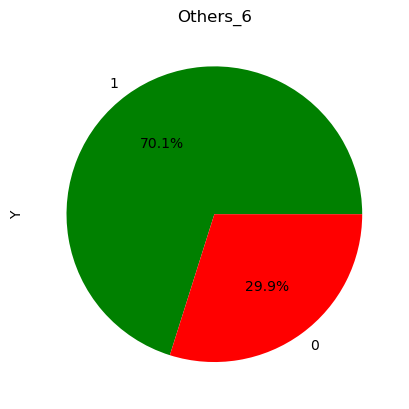

In [111]:
others_6['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_6')

**Final Conclusion**

To sum up my investigation of the cheap restaurant coupons, it would seem that most users (about %70) are eager to accept the cheap restaurant coupons.

What's more, I can hypothesize that users who visit more cheap and expensive restaurants are more likely to accept the coupon. 

Having an income of between $(37.5-62.5)k in addition seems to also greatly encourage them to accept the coupon.

**Recommended Action**

I suggest offering Cheap (<20) Restaurant Coupons to users who are frequent visitors to both cheap and expensive restaurants. Among these specified users, I suggest on mainly targeting users whose income is within $(37.5-62.5)k range.

*Note: Due to the tedious repetitiveness of creating "Others" pie charts in the last investigation and how I find them to be informatively unreliable most of the time, I will no longer create them from now on unless I actually find use in them.*
*I also find the lack of format freedom in matplotlib titles and how my titles may be obnoxiously long so I am going to sometimes rely on textual Markdown as my pie chart titles.*

### Investigating the Expensive Restaurant (20-50) Coupons

Let's see the acceptance rate of all users who have received the (20-50) restaurant coupons.

In [112]:
exp_resto_coupon = data_clean.query('coupon == "Restaurant(20-50)"')

In [113]:
exp_resto_coupon['coupon'].unique()

array(['Restaurant(20-50)'], dtype=object)

<Axes: title={'center': '20-50 Resto Coupon Acceptance Rate'}, ylabel='Y'>

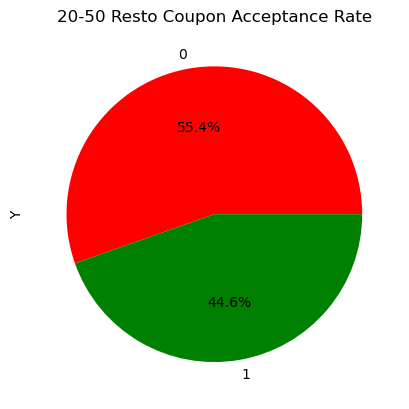

In [114]:
exp_resto_coupon['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['r', 'g'], 
        title='20-50 Resto Coupon Acceptance Rate')

It seems that the overall acceptance rate of coupons for expensive restaurants is lower than that for cheap restaurants.

This is most likely due to expense.

However, more expensive restaurants may provide better quality food/decorations/services in general.

Perhaps users with a married partner as their passenger would want to have an expensive fancy food time with each other. Let's see if that may be the case. 

In [115]:
spouse = exp_resto_coupon.query('maritalStatus == "Married partner" and passenger == "Partner"')

In [116]:
spouse['maritalStatus'].unique()

array(['Married partner'], dtype=object)

In [117]:
spouse['passenger'].unique()

array(['Partner'], dtype=object)

**Married Partners 20-50 Resto Coupon Approval Rate**

<Axes: ylabel='Y'>

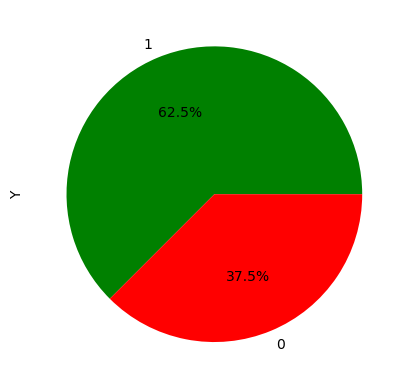

In [118]:
spouse['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'])

Looks like I may have hit the nail on married partners wanting to have a fancy food time with each other as the acceptance rate for expensive restaurant coupons significantly increased for married couples.

Let's see if users with unmarried partners would also be eager to accept expensive restaurant coupons to impress their partners.

In [119]:
not_married = exp_resto_coupon.query('maritalStatus == "Unmarried partner" and passenger == "Partner"')

In [120]:
not_married['maritalStatus'].unique()

array(['Unmarried partner'], dtype=object)

In [121]:
not_married['passenger'].unique()

array(['Partner'], dtype=object)

**Unmarried Partners 20-50 Resto Coupon Approval Rate**

<Axes: ylabel='Y'>

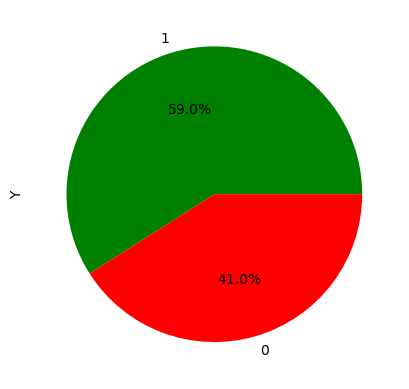

In [122]:
not_married['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'])

Not as much as married but its acceptance rate still increased compared to the overall acceptance rate.

Let's see if users with a partner as their passenger tend to have marital status of married or unmarried partner.

In [123]:
partner_passenger = exp_resto_coupon.query('passenger == "Partner"')
partner_passenger['maritalStatus'].unique()

array(['Unmarried partner', 'Married partner', 'Divorced', 'Single',
       'Widowed'], dtype=object)

Apparently there are five different marital statuses for users who is driving with a partner. Let's build a barplot that counts the proportion of users among the five marital status that accept the coupon or not.

<Axes: title={'center': '20-50 Resto Coupon'}, xlabel='maritalStatus'>

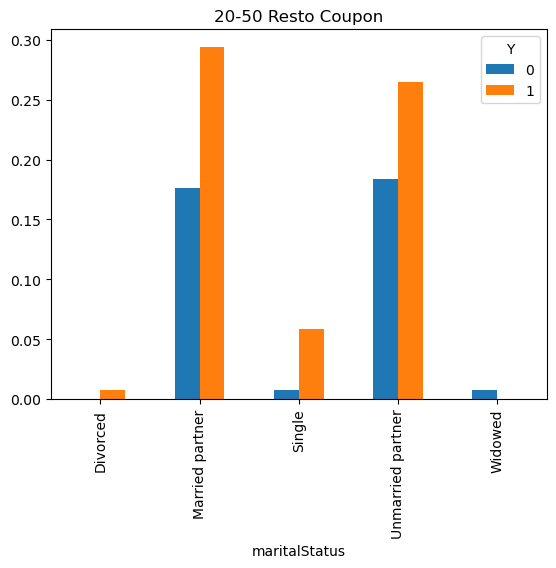

In [124]:
pd.crosstab(partner_passenger.maritalStatus, partner_passenger.Y, normalize = True).plot(kind = 'bar', title="20-50 Resto Coupon")

This plot tells us that most users with a passenger would accept the 20-50 resto coupon. Users with martial status of either 'Divorced', 'Married Partner', 'Single', or 'Unmarried Partner' will more likely to accept the coupon.

What about users who don't have a partner as their passenger? Would they less likely accept the coupon since they either have nonromantic passenger(s) or none at all? Let's find out using a pie chart.

In [125]:
partnerless = exp_resto_coupon.query('passenger != "Partner"')

**Users with Non-Partner Passenger(s) Acceptance Rate of 20-50 Resto Coupon**

<Axes: ylabel='Y'>

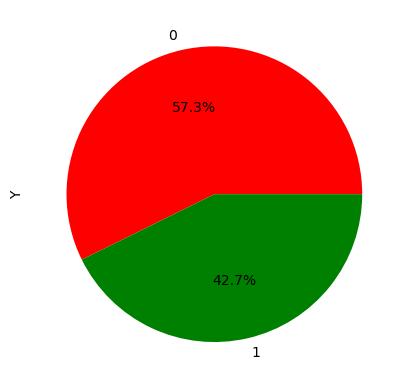

In [126]:
partnerless['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['r', 'g'])

**Final Conclusion**

Based on my investigation, I can hypothesize that users with a partner as their passenger will more likely accept a coupon for an expensive restaurant. They will more likely do so if they are either single, have an unmarried or married partner, or are divorced. However, if they are widowed, then they probably won't accept the coupon.

**Recommended Action**

I recommend offering Expensive ($20-50) Restaurant Coupons to users who currently have a partner as their passengers. We may expect that users with a partner would like to impress their partner or to give them a fancy meal time.

However, I suggest that you avoid offering the coupons to widowed users even if they have a partner with them as a passenger. Being widowed may imply that the user may had a traumatic experience with their dead former lover which may disturb their relationship with a potentially new lover and thus the user would be less likely to offer his/her partner a fancy meal time.

### Investigating the Coffee House Coupons

Finding the acceptance rate of users who have received a coupon for a coffeehouse.

In [127]:
coffee_coupon = data_clean.query('coupon == "Coffee House"')

In [128]:
coffee_coupon['coupon'].unique()

array(['Coffee House'], dtype=object)

<Axes: title={'center': 'Acceptance Rate of Coffee House Coupons'}, ylabel='Y'>

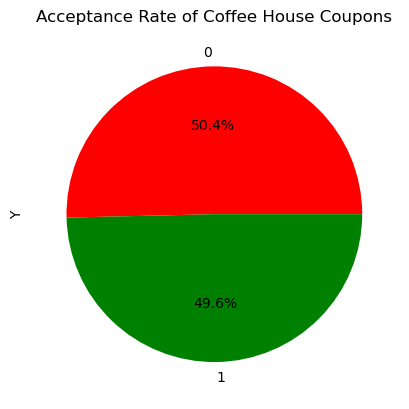

In [129]:
coffee_coupon['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['r', 'g'], title='Acceptance Rate of Coffee House Coupons')

Wow, this is the closest 50/50 acceptance rate I have ever seen. About half of the users who receive the coffee house coupon would like to use it while the other half don't.

I intuitively think that many people go to coffee house for caffeine so that they can have more energy to get through the day. Thus, I would think coffee is usually a morning beverage. Perhaps users will more likely accept the coffee house coupon during the morning.

Let's create a barplot that counts the proportion of users who accept the coupon or not throughout the 24-hour-time.

<Axes: title={'center': 'Coffee House Coupon'}, xlabel='time_hour_24'>

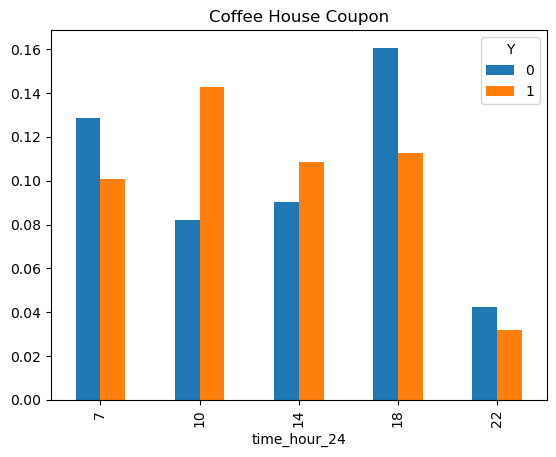

In [130]:
pd.crosstab(coffee_coupon['time_hour_24'],coffee_coupon.Y,normalize=True).plot(kind='bar',title='Coffee House Coupon')

According to the barplot, users at 10AM will more likely accept the coupon as expected since it is still morning at the time. I am rather surprised that users at 7AM would less likely accept the coupons.

Perhaps most of the users at 7AM happened to be still young at that specific time. I would intuitively think that perhaps older people would more likely drink coffee and thus more likely accept the coupon. 

Let's measure the proportion of age among users throughout the time.

<Axes: xlabel='time_hour_24'>

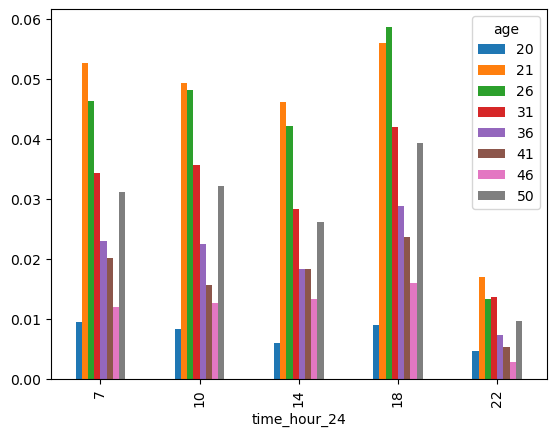

In [131]:
pd.crosstab(coffee_coupon['time_hour_24'],coffee_coupon.age,normalize=True).plot(kind='bar')

Throughout the 24-hour-time, most users are aged 21-26. Considering that we are talking about ages that have already reached adulthood and beyond along with the fact that age 21-26 is still pretty young and is common throughout all specified time, then perhaps age doesn't have to do much with accepting the coupon.

Let's see if users who monthly visit more coffee house would more likely accept the coupon.

I would want to capture the relationship between monthly visit coffee house and the coupon acceptance but instead of using a scatterplot which is not effective considering that data tend to overlap one another, I will use a heatmap instead since it might better capture its frequency.

<Axes: xlabel='CoffeeHouse', ylabel='Y'>

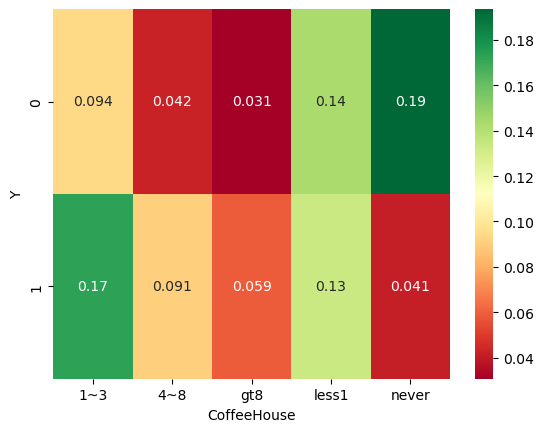

In [132]:
sns.heatmap(pd.crosstab(coffee_coupon.Y,coffee_coupon.CoffeeHouse,normalize=True),annot=True,cmap='RdYlGn')

I notice that there is a higher density at the Y=1 area than Y=0 area when users monthly visit the coffee house at least once.

Let's see if we will get a high acceptance rate of coffee house coupons if we look for users who monthly visit the coffee house at least once and are driving at 10AM.

In [133]:
coffee_at_10 = coffee_coupon[coffee_coupon['time_hour_24'] == 10]
coffee_at_10 = coffee_at_10.query('CoffeeHouse in @at_least_1')

In [134]:
coffee_at_10['time_hour_24'].unique()

array([10], dtype=int64)

In [135]:
coffee_at_10['CoffeeHouse'].unique()

array(['4~8', '1~3', 'gt8'], dtype=object)

**Acceptance Rate of Coffee House Coupon (Monthly Coffee House Visit >= 1, Time = 10AM)**

<Axes: ylabel='Y'>

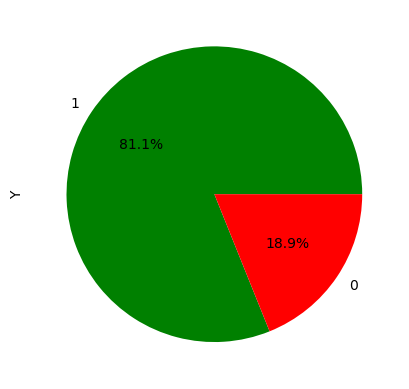

In [136]:
coffee_at_10['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'])

As confirmation, let's look at all other users and see if the acceptance rate for the Coffee House coupon decreases.

In [137]:
other__1 = coffee_coupon.query('time_hour_24 != 10 or CoffeeHouse not in @at_least_1')

In [138]:
other__1[['time_hour_24','CoffeeHouse']].sample(5)

,time_hour_24,CoffeeHouse
5752,18,1~3
7667,18,never
5402,18,1~3
10708,14,less1
4596,10,never


<Axes: title={'center': 'Others'}, ylabel='Y'>

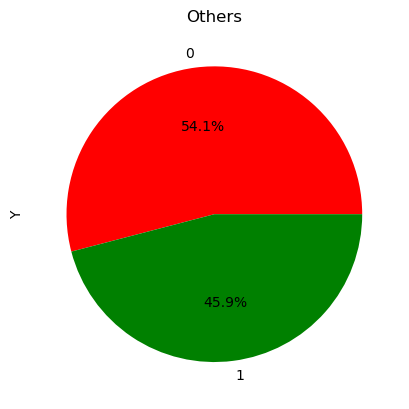

In [139]:
other__1['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['r', 'g'], title='Others')

Yes, the acceptance rate has indeed decrease even if it was just a little.

**Final Conclusion**

I can hypothesize that users who monthly visit the coffee house at least once will more likely accept the coupon for the Coffee House. If these said users are also driving at 10AM in addition, then they will most likely accept the coupon.

**Recommended Action**

You should obviously aim for users who monthly visit the Coffee House at least once if you are offering them a Coffee House coupon. In addition, I suggest you go for users who are driving at around 10AM as that may be the popular time for users to want some coffee for the morning. I do not think age matter in this case so feel free to offer the coupons to users, primarily adults or older, of any age as long as they fit the conditions I have set.

### Investigating the Carry out & Take away (To-Go) Coupons

As usual, let's find the proportion of users who will accept the carry out & take away coupons out of all users who have received it.

In [140]:
carry_take = data_clean.query('coupon == "Carry out & Take away"')

In [141]:
carry_take['coupon'].unique()

array(['Carry out & Take away'], dtype=object)

<Axes: title={'center': 'To-Go Coupon Acceptance Rate'}, ylabel='Y'>

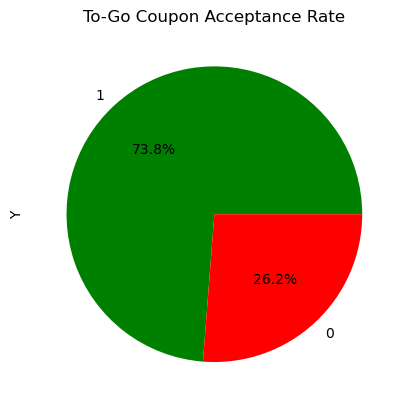

In [142]:
carry_take['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], title='To-Go Coupon Acceptance Rate')

Most users who received this coupon accepted it but let's see if we can find users with specific backgrounds that will more likely accept it.

Since this coupon has to do with picking up food, I'd say it would be most convenient if users can pick it up on the way to their destination. 

Thus, let's compare the acceptance rate of users who would or wouldn't have to backtrack if they were to accept the coupon.

In [143]:
no_backtrack = carry_take.query('direction_same == 1')
backtrack = carry_take.query('direction_opp == 1')

<Axes: title={'center': 'To-Go Coupon Acceptance Rate (Same Direction)'}, ylabel='Y'>

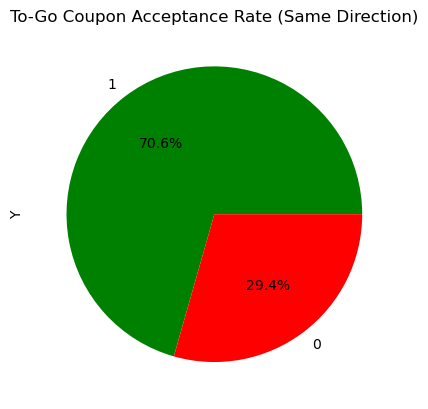

In [144]:
no_backtrack['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', 
                                    colors = ['g', 'r'], title='To-Go Coupon Acceptance Rate (Same Direction)')

<Axes: title={'center': 'To-Go Coupon Acceptance Rate (Opposite Direction)'}, ylabel='Y'>

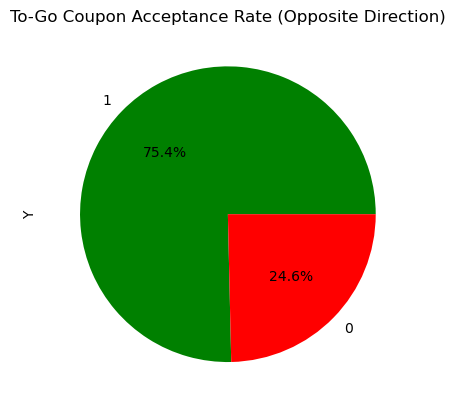

In [145]:
backtrack['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', 
                                    colors = ['g', 'r'], title='To-Go Coupon Acceptance Rate (Opposite Direction)')

This is not what I expect. It would seem that whether they need to backtrack or not wouldn't matter to the users if they were to accept the coupon.

I don't think users would likely accept this coupon if they need to drive the opposite direction of their destination as that sounds unintuitive. Perhaps many users who needed to go to the opposite direction happens to be already close to it so it may not have matter.

I will investigate further on the three columns that start with 'toCoupon_GEQ' as I believe that they are responsible for telling us how long it would take for the users to get to the location for them to use their coupon.

In [146]:
to_coupon = [label for label in carry_take.columns if label.startswith('toCoupon_GEQ')]
to_coupon

['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

Presuming that only one of the three columns will have a '1' representing 'True' while the others are '0' representing 'False', I wanted to take advantage of that by creating a new column that will add all three columns together, each multiplied by its specified minutes. 

That way, I would get a column of the minutes it would take for the users to arrive at a location to use their coupon.

In [147]:
minToCoupon = carry_take[to_coupon[0]] * 5 + carry_take[to_coupon[1]] * 15 + carry_take[to_coupon[2]] * 25
minToCoupon

25       20
33       20
41        5
47       20
55       20
         ..
12665     5
12672    20
12673     5
12679     5
12680     5
Length: 2280, dtype: int64

I found it strange that some elements are 20 minutes since there are only 5, 15, and 25 minutes and thus, I decided to investigate the three columns.

In [148]:
carry_take[to_coupon].head(5)

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min
25,1,1,0
33,1,1,0
41,1,0,0
47,1,1,0
55,1,1,0


I did not expect that more than one of these columns could be marked as '1' but perhaps some users have more than one location to get their coupons. Thus, creating a column 'minToCoupon' would be unreliable.

I might also wrongly interpret the three columns and that instead of representing true/false, they might represent a number of locations to get there at the same time. Thus, to confirm that, I look for all unique values in each of the three columns.

In [149]:
carry_take[to_coupon[0]].unique()

array([1], dtype=int64)

In [150]:
carry_take[to_coupon[1]].unique()

array([1, 0], dtype=int64)

In [151]:
carry_take[to_coupon[2]].unique()

array([0, 1], dtype=int64)

Looks like I correctly interpret that the three columns are indeed about True/False. I also gain an additional information.

If you pay attention to 'carry_take[to_coupon[0]].unique()', you will notice that it implies that column 'toCoupon_GEQ5min' is always '1' in dataframe carry_take, i.e. all users who have received the carry out & take away coupon. 

This means that all users who receive this coupon are only 5 minutes away from a location to use their coupon. That may explain why users wouldn't care less if they backtrack since the location is close from the start.

In fact, since all users know that they can use the coupon after only traveling for 5 minutes, that would boost their likelihood to accept the coupon which can explain why we have about 3 quarters of them accepting the coupon.

I will now focus on the column 'destination' and look through all the unique elements.

In [152]:
carry_take['destination'].unique()

array(['No Urgent Place', 'Work', 'Home'], dtype=object)

I suspect that if the users need to go to 'Work', then they would mostly have no time to go to a restaurant. They would probably need a carry out and take away food for a meal break at their workplace. 

To confirm that, I will create a heatmap of columns 'Y' vs. 'destination' expecting that area Y=1 and destination=Work would have a high density.

<Axes: xlabel='destination', ylabel='Y'>

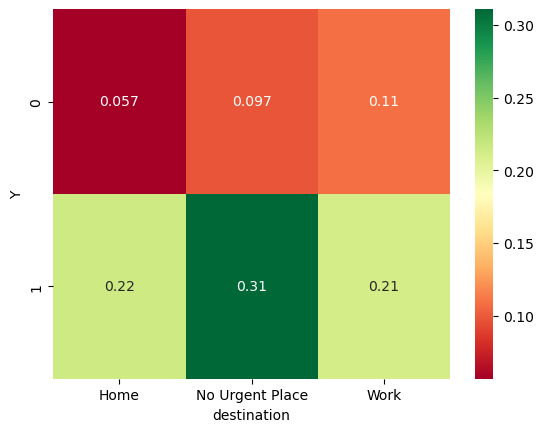

In [153]:
sns.heatmap(pd.crosstab(carry_take.Y,carry_take.destination,normalize=True),annot=True,cmap="RdYlGn")

I did not expect this either. On top of that, to think that users going to 'Work' would have the highest likelihood to reject the coupon according to the heatmap showing the highest density at Y=0, destination=Work then all other Y=0 areas.

The heatmap seems to imply that users who have 'no urgent place destination' would have the highest likelihood to accept the coupon.

Let's might as well create a heatmap for 'Y' vs. 'CarryAway' to see if users who monthly uses more CarryAway services would more likely to accept the CarryAway coupon as I intuitively think that would be the case.

<Axes: xlabel='CarryAway', ylabel='Y'>

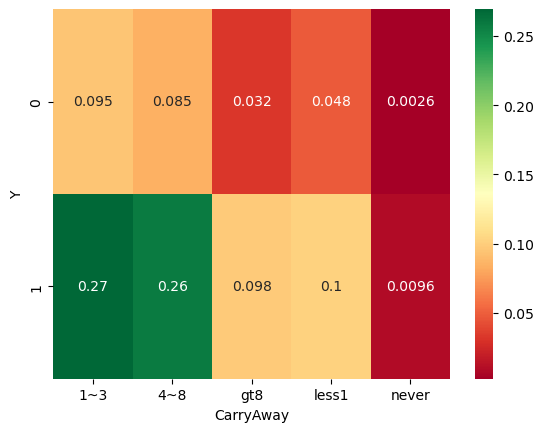

In [154]:
sns.heatmap(pd.crosstab(carry_take.Y,carry_take.CarryAway,normalize=True),annot=True,cmap="RdYlGn")

Yeah, mostly from what I expect, the users who monthly do CarryAway at least once will likely to accept the coupon made specifically for that.

**Final Conclusion**

Based on my investigation, I can hypothesize that maintaining within 5 min. distance from the users to use the CarryAway coupon will encourage the users to accept them. In addition, if the users are not going anywhere urgent and are monthly doing CarryAway at least once, primarily in range of 1-8 times, then they would more likely accept them.

**Recommended Action**

As mentioned before, offer CarryAway coupons to users who can use this coupon in a location within a 5 min. driving range. For those within a 5 min. driving distance, I suggest to specifically target ones who monthly visit a Coffee House at least once but ideally within 1-8 times. Furthermore, the less urgent that the users feel to go anywhere, the better.